Using demo dataset: Breast Cancer (binary)

Running detailed Stratified K-Fold evaluation…


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Fold 1: acc=0.9561, F1_macro=0.9539
Fold 2: acc=0.9211, F1_macro=0.9138


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 3: acc=0.9474, F1_macro=0.9422


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Fold 4: acc=0.9474, F1_macro=0.9440
Fold 5: acc=0.9646, F1_macro=0.9613

Mean ± Std across folds (macro averages):
        accuracy: 0.9473 ± 0.0163
 precision_macro: 0.9489 ± 0.0170
    recall_macro: 0.9398 ± 0.0220
        f1_macro: 0.9431 ± 0.0181

Per-class averages across folds:
  Class 0: precision=0.949, recall=0.910, f1=0.928, support_total=212
  Class 1: precision=0.949, recall=0.969, f1=0.959, support_total=357


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


[scikit-learn cross_validate summary]
        accuracy: 0.9526 ± 0.0159
 precision_macro: 0.9545 ± 0.0132
    recall_macro: 0.9452 ± 0.0227
        f1_macro: 0.9487 ± 0.0176


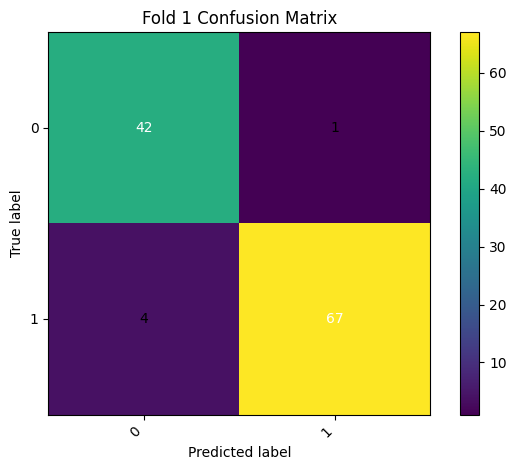

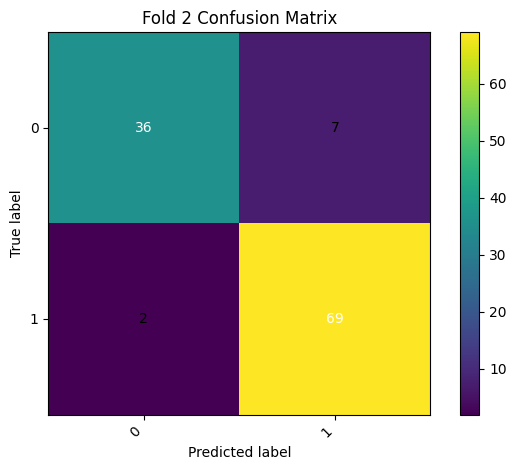

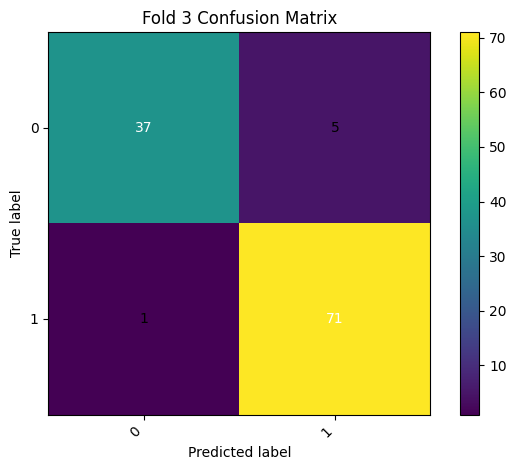

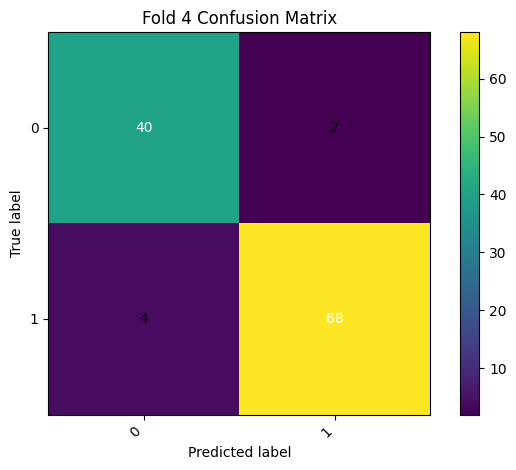

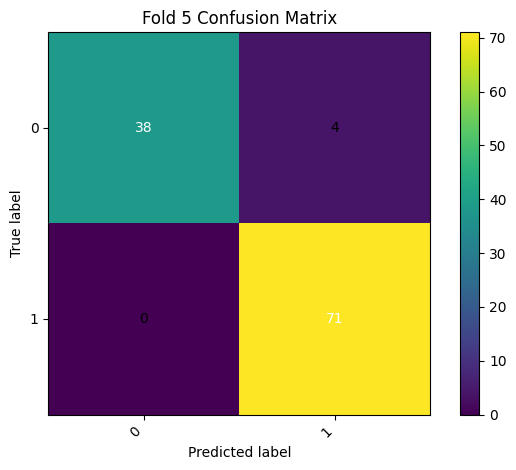

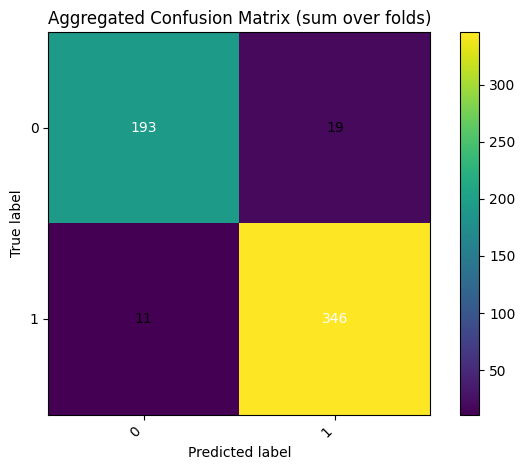

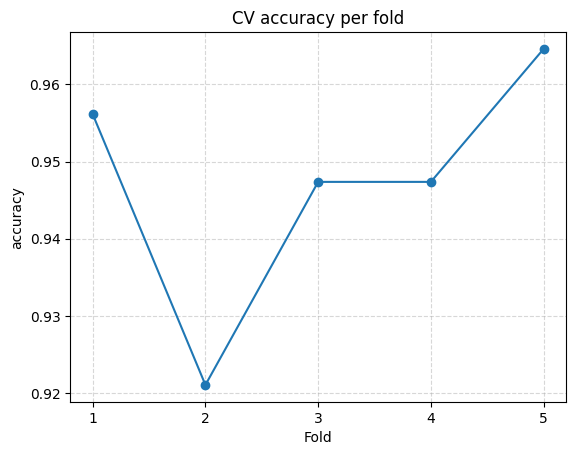

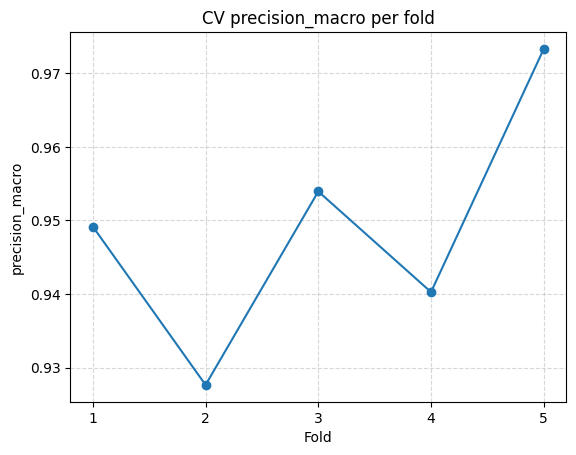

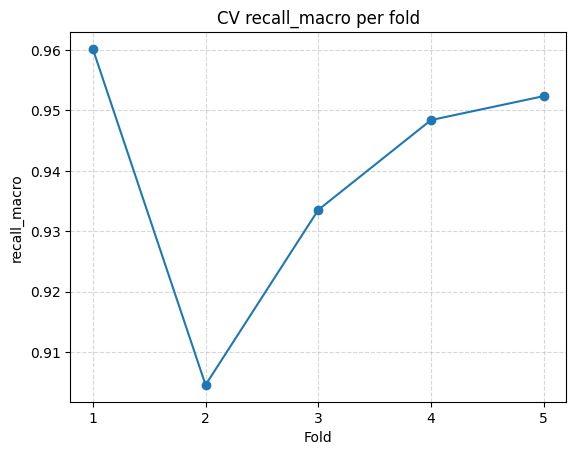

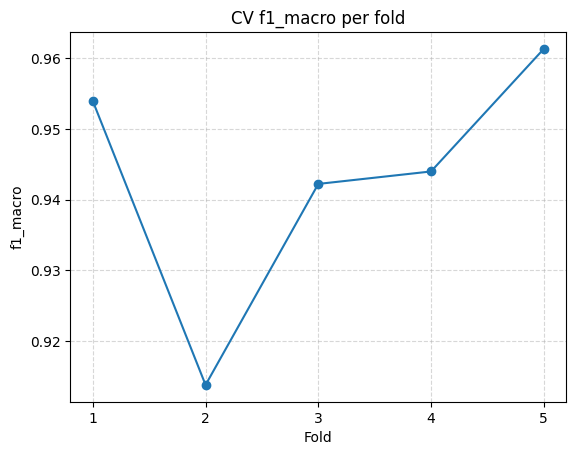


Done.


In [1]:
from __future__ import annotations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import Dict, List, Tuple, Optional, Any

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
    confusion_matrix,
)
from sklearn.preprocessing import LabelEncoder

# Example models – feel free to swap any sklearn classifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# =============================
# User-configurable parameters
# =============================
USE_CSV = False  # Set to True to load your CSV; False uses a demo dataset
DATA_PATH = r"/content/drive/MyDrive/IMDB Dataset.csv"   # e.g., r"C:\\Users\\you\\data.csv" or "/mnt/data/your_file.csv"
TARGET_COLUMN = "target"  # <-- change to your label column name
CV_FOLDS = 5
RANDOM_STATE = 42
SHOW_PLOTS = True  # Set False to skip plotting (useful on headless servers)

# Choose a model (swap to any sklearn classifier)
MODEL = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
# Alternative examples:
# MODEL = RandomForestClassifier(n_estimators=300, random_state=RANDOM_STATE)


# =============================
# Data loading utilities
# =============================
def load_csv_dataset(path: str, target_col: str) -> Tuple[pd.DataFrame, pd.Series]:
    """Load a CSV classification dataset.
    Assumes features are already numeric / preprocessed.
    Returns X (DataFrame) and y (Series).
    """
    df = pd.read_csv(path)
    if target_col not in df.columns:
        raise ValueError(f"TARGET_COLUMN '{target_col}' not found in columns: {list(df.columns)[:10]}…")
    X = df.drop(columns=[target_col])
    y = df[target_col]
    return X, y


def load_demo_dataset() -> Tuple[pd.DataFrame, pd.Series, List[str]]:
    """Fallback demo: Breast cancer dataset (binary classification)."""
    from sklearn.datasets import load_breast_cancer
    data = load_breast_cancer()
    X = pd.DataFrame(data.data, columns=data.feature_names)
    y = pd.Series(data.target, name="target")
    target_names = list(data.target_names)
    return X, y, target_names


# =============================
# Metric computation
# =============================
@dataclass
class FoldMetrics:
    accuracy: float
    precision_macro: float
    recall_macro: float
    f1_macro: float
    per_class: Dict[Any, Dict[str, float]]  # label -> {precision, recall, f1, support}
    confusion: np.ndarray


def compute_metrics(y_true: np.ndarray, y_pred: np.ndarray, labels: List[Any]) -> FoldMetrics:
    """Compute accuracy, macro precision/recall/F1, per-class metrics, and confusion matrix."""
    acc = accuracy_score(y_true, y_pred)

    # average=None returns per-class; macro averages classes equally
    prec_c, rec_c, f1_c, support_c = precision_recall_fscore_support(
        y_true, y_pred, labels=labels, average=None, zero_division=0
    )
    prec_macro, rec_macro, f1_macro, _ = precision_recall_fscore_support(
        y_true, y_pred, labels=labels, average="macro", zero_division=0
    )

    per_class = {}
    for lab, p, r, f1, s in zip(labels, prec_c, rec_c, f1_c, support_c):
        per_class[lab] = {
            "precision": float(p),
            "recall": float(r),
            "f1": float(f1),
            "support": int(s),
        }

    cm = confusion_matrix(y_true, y_pred, labels=labels)

    return FoldMetrics(
        accuracy=float(acc),
        precision_macro=float(prec_macro),
        recall_macro=float(rec_macro),
        f1_macro=float(f1_macro),
        per_class=per_class,
        confusion=cm,
    )


# =============================
# Cross-validation core
# =============================
@dataclass
class CVResults:
    fold_metrics: List[FoldMetrics]
    mean_std: Dict[str, Tuple[float, float]]  # metric -> (mean, std)
    per_class_avg: Dict[Any, Dict[str, float]]
    labels: List[Any]


def cross_validate_model(model, X: pd.DataFrame, y: pd.Series, cv: int = 5, random_state: int = 42) -> CVResults:
    """Run Stratified K-Fold CV, compute metrics per fold, and aggregate."""
    # Encode labels to ensure contiguous integers (works for strings, etc.)
    le = LabelEncoder()
    y_enc = le.fit_transform(y)
    labels = list(range(len(le.classes_)))  # numeric labels used internally

    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=random_state)

    fold_metrics: List[FoldMetrics] = []
    for fold_idx, (tr, te) in enumerate(skf.split(X, y_enc), start=1):
        X_tr, X_te = X.iloc[tr], X.iloc[te]
        y_tr, y_te = y_enc[tr], y_enc[te]

        model_ = clone_estimator(model)
        model_.fit(X_tr, y_tr)
        y_pred = model_.predict(X_te)

        fm = compute_metrics(y_te, y_pred, labels=labels)
        fold_metrics.append(fm)

        print(f"Fold {fold_idx}: acc={fm.accuracy:.4f}, F1_macro={fm.f1_macro:.4f}")

    # Aggregate macro metrics
    accs = np.array([fm.accuracy for fm in fold_metrics])
    precs = np.array([fm.precision_macro for fm in fold_metrics])
    recs = np.array([fm.recall_macro for fm in fold_metrics])
    f1s = np.array([fm.f1_macro for fm in fold_metrics])

    mean_std = {
        "accuracy": (float(accs.mean()), float(accs.std(ddof=1) if len(accs) > 1 else 0.0)),
        "precision_macro": (float(precs.mean()), float(precs.std(ddof=1) if len(precs) > 1 else 0.0)),
        "recall_macro": (float(recs.mean()), float(recs.std(ddof=1) if len(recs) > 1 else 0.0)),
        "f1_macro": (float(f1s.mean()), float(f1s.std(ddof=1) if len(f1s) > 1 else 0.0)),
    }

    # Average per-class metrics across folds
    # Build accumulator: label -> list of {precision, recall, f1, support}
    per_class_accum: Dict[int, Dict[str, List[float]]] = {
        lab: {"precision": [], "recall": [], "f1": [], "support": []} for lab in labels
    }
    for fm in fold_metrics:
        for lab, d in fm.per_class.items():
            per_class_accum[lab]["precision"].append(d["precision"])
            per_class_accum[lab]["recall"].append(d["recall"])
            per_class_accum[lab]["f1"].append(d["f1"])
            per_class_accum[lab]["support"].append(d["support"])  # support varies per fold

    per_class_avg_num: Dict[int, Dict[str, float]] = {}
    for lab in labels:
        per_class_avg_num[lab] = {
            "precision": float(np.mean(per_class_accum[lab]["precision"])) if per_class_accum[lab]["precision"] else 0.0,
            "recall": float(np.mean(per_class_accum[lab]["recall"])) if per_class_accum[lab]["recall"] else 0.0,
            "f1": float(np.mean(per_class_accum[lab]["f1"])) if per_class_accum[lab]["f1"] else 0.0,
            # total support across folds (optional):
            "support_total": int(np.sum(per_class_accum[lab]["support"])) if per_class_accum[lab]["support"] else 0,
        }

    # Convert numeric labels back to original names for readability
    label_map = {i: name for i, name in enumerate(le.classes_)}
    per_class_avg_named = {label_map[i]: d for i, d in per_class_avg_num.items()}

    return CVResults(
        fold_metrics=fold_metrics,
        mean_std=mean_std,
        per_class_avg=per_class_avg_named,
        labels=[label_map[i] for i in labels],
    )


# =============================
# Visualization helpers
# =============================
def visualize_confusion_matrix(cm: np.ndarray, labels: List[Any], normalize: bool = False, title: str = "Confusion Matrix") -> None:
    """Plot a (optionally normalized) confusion matrix using matplotlib only."""
    if normalize:
        cm = cm.astype(float)
        row_sums = cm.sum(axis=1, keepdims=True)
        row_sums[row_sums == 0] = 1.0
        cm = cm / row_sums

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest')
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]))
    ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.set_yticklabels(labels)
    ax.set_ylabel("True label")
    ax.set_xlabel("Predicted label")
    ax.set_title(title)

    # Add counts/values in cells
    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.0 if cm.size > 0 else 0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            value = format(cm[i, j], fmt)
            ax.text(j, i, value, ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()


def plot_cv_metric_trends(cvres: CVResults) -> None:
    """Plot per-fold metrics: Accuracy, Precision_macro, Recall_macro, F1_macro."""
    metrics = {
        "accuracy": [fm.accuracy for fm in cvres.fold_metrics],
        "precision_macro": [fm.precision_macro for fm in cvres.fold_metrics],
        "recall_macro": [fm.recall_macro for fm in cvres.fold_metrics],
        "f1_macro": [fm.f1_macro for fm in cvres.fold_metrics],
    }
    folds = np.arange(1, len(cvres.fold_metrics) + 1)

    for name, values in metrics.items():
        plt.figure()
        plt.plot(folds, values, marker='o')
        plt.xticks(folds)
        plt.xlabel("Fold")
        plt.ylabel(name)
        plt.title(f"CV {name} per fold")
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()


def plot_aggregated_confusion(cvres: CVResults) -> None:
    """Sum confusion matrices over folds to get a global view and visualize it."""
    agg_cm = None
    for fm in cvres.fold_metrics:
        agg_cm = fm.confusion if agg_cm is None else agg_cm + fm.confusion
    visualize_confusion_matrix(agg_cm, cvres.labels, normalize=False, title="Aggregated Confusion Matrix (sum over folds)")


# =============================
# Utility – safe estimator cloning without importing from private APIs
# =============================
def clone_estimator(estimator):
    """A tiny clone helper so we don't depend on sklearn.base.clone explicitly."""
    from sklearn.base import clone as sk_clone
    return sk_clone(estimator)


# =============================
# Quick wrapper to also show scikit-learn's cross_validate
# =============================
def quick_cross_validate(model, X, y, cv=5):
    """Use sklearn.cross_validate to show mean/std quickly (for reference)."""
    scoring = {
        'accuracy': 'accuracy',
        'precision_macro': 'precision_macro',
        'recall_macro': 'recall_macro',
        'f1_macro': 'f1_macro',
    }
    res = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=False)
    summary = {k.replace('test_', ''): (np.mean(v), np.std(v, ddof=1) if len(v)>1 else 0.0)
               for k, v in res.items() if k.startswith('test_')}
    print("\n[scikit-learn cross_validate summary]")
    for metric, (m, s) in summary.items():
        print(f"{metric:>16}: {m:.4f} ± {s:.4f}")


# =============================
# Main demo / entry point
# =============================
if __name__ == "__main__":
    if USE_CSV:
        print(f"Loading CSV from: {DATA_PATH}")
        X, y = load_csv_dataset(DATA_PATH, TARGET_COLUMN)
        target_names = None  # if you have known class names, set a list here
    else:
        print("Using demo dataset: Breast Cancer (binary)")
        X, y, target_names = load_demo_dataset()

    # If you want to map numeric labels to readable names in plots, set labels here
    if target_names is not None and len(np.unique(y)) == len(target_names):
        # keep names – cross_validate_model will auto-handle
        pass

    print("\nRunning detailed Stratified K-Fold evaluation…")
    cvres = cross_validate_model(MODEL, X, y, cv=CV_FOLDS, random_state=RANDOM_STATE)

    print("\nMean ± Std across folds (macro averages):")
    for k, (m, s) in cvres.mean_std.items():
        print(f"{k:>16}: {m:.4f} ± {s:.4f}")

    print("\nPer-class averages across folds:")
    for lab, d in cvres.per_class_avg.items():
        print(f"  Class {lab}: precision={d['precision']:.3f}, recall={d['recall']:.3f}, f1={d['f1']:.3f}, support_total={d['support_total']}")

    # Also show scikit-learn's built-in cross_validate (for reference)
    quick_cross_validate(MODEL, X, y, cv=CV_FOLDS)

    if SHOW_PLOTS:
        # Plot per-fold confusion matrices and an aggregated one
        for i, fm in enumerate(cvres.fold_metrics, start=1):
            visualize_confusion_matrix(fm.confusion, cvres.labels, normalize=False, title=f"Fold {i} Confusion Matrix")
        plot_aggregated_confusion(cvres)
        plot_cv_metric_trends(cvres)

    print("\nDone.")
